In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
trainweek = pd.read_excel(r"G:\traindata\yddata\yd_weeksale.xlsx")

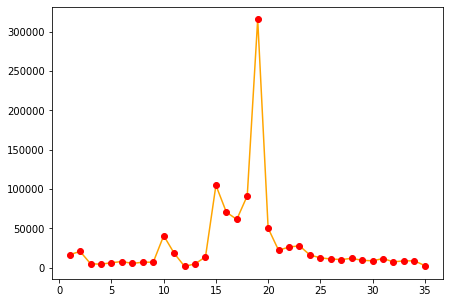

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.plot(trainweek['week'],trainweek['money'],c="orange",label= "Data")
ax.plot(trainweek['week'],trainweek['money'],'ro')
# plt.xticks(rotation=90)
plt.show()

In [7]:
X = trainweek.iloc[:,trainweek.columns != 'money']
y = trainweek['money']
y = y.values.reshape(-1, 1)

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=17)
reg = LinearRegression().fit(Xtrain,Ytrain)
k = reg.score(Xtrain,Ytrain)
k

0.09149100030443147

<function matplotlib.pyplot.show(*args, **kw)>

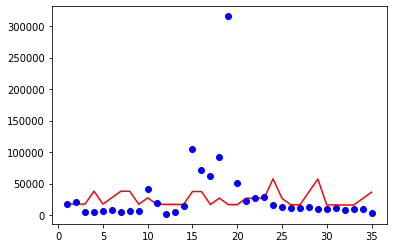

In [46]:
# y_hat = reg.predict(Xtest)
# plt.plot(Xtest,y_hat,'r-')
# plt.plot(Xtest,Ytest,'bo')
# plt.show
y_pre = reg.predict(X)#展示
plt.plot(X.iloc[:,0],y_pre,'r-')
plt.plot(X.iloc[:,0],y,'bo')
plt.show

In [36]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=33)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)#添加多项式回归，增加拟合程度
Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
Xtest_poly = poly.fit_transform(Xtest)#
X_poly = poly.fit_transform(X)
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)
j = model.score(Xtest_poly,Ytest)
j


0.46125892173879224

In [37]:
Y_pre = model.predict(Xtest_poly)

<function matplotlib.pyplot.show(*args, **kw)>

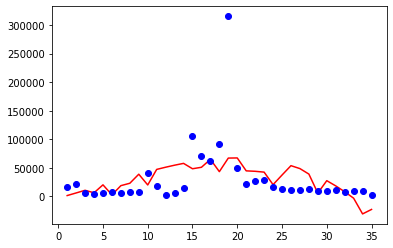

In [40]:
# plt.plot(Xtest,Y_pre,'ro')
# plt.plot(Xtest,Ytest,'bo')
# plt.show
Y_pre = model.predict(X_poly)#展示
plt.plot(X.iloc[:,0],Y_pre,'r-')
plt.plot(X.iloc[:,0],y,'bo')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

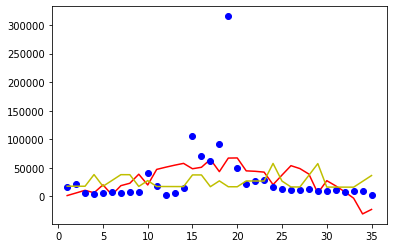

In [47]:
plt.plot(X.iloc[:,0],Y_pre,'r-')
plt.plot(X.iloc[:,0],y,'bo')
plt.plot(X.iloc[:,0],y_pre,'y-')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

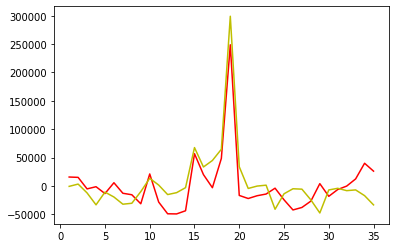

In [48]:
plt.plot(X.iloc[:,0],y-Y_pre,'r-')
# plt.plot(X.iloc[:,0],y,'bo')
plt.plot(X.iloc[:,0],y-y_pre,'y-')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

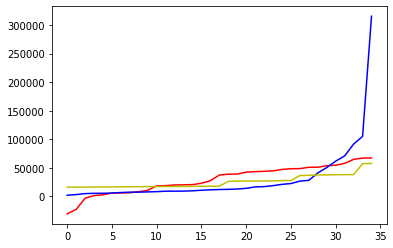

In [49]:
plt.plot(range(len(Y_pre)),sorted(Y_pre),'r-',label = 'polypredict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.plot(range(len(y_pre)),sorted(y_pre),'y-',label = 'predict')
plt.show

In [50]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error(y,Y_pre)#多项平均绝对误差

28530.353560059077

In [53]:
mean_absolute_error(y,y_pre)#普通线性回归绝对误差

27505.065585755157